<a href="https://colab.research.google.com/github/7008862564/Order_Demand_Prediction_RandomForest_Regression_Tree/blob/master/Decission_Tree_Random_Forest_Regressor_trail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/hpd_final_two.csv')
df = df.dropna()
df["Date"]=pd.to_datetime(df["Date"])
df["Date"] = df["Date"].dt.strftime('%Y%m')

df.sort_values(by=['Date'], inplace=True, ascending=True)
df["md_Date"] = df["Date"]


categories = df.Product_Category.unique()
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand,Customer_Code,Customer_Zip,Customer_City,Customer_State,Customer_Region,Customer_Country,Customer_Type,md_Date
1018603,Product_0982,Whse_A,Category_028,201101,4500,CC19299,713301,Asansol,West Bengal,east,India,Internal_goods,201101
950183,Product_0981,Whse_A,Category_028,201101,50,CC15711,734001,Siliguri,West Bengal,east,India,Wholesale,201101
455168,Product_1102,Whse_S,Category_004,201101,1200,CC12253,601021,Kollam,Kerala,south,India,Internal_goods,201101
917177,Product_1507,Whse_C,Category_019,201102,1250,CC19300,111045,Pune,Maharastra,west,India,Internal_goods,201102
817557,Product_0981,Whse_A,Category_028,201102,2500,CC15832,831001,Jamshedpur,Jharkhand,east,India,Internal_goods,201102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160294,Product_0689,Whse_J,Category_011,201706,300,CC13994,226001,Lucknow,UP,north,India,Wholesale,201706
851614,Product_0689,Whse_J,Category_011,201706,200,CC15287,223007,Agra,UP,north,India,Internal_goods,201706
619509,Product_0471,Whse_C,Category_015,201709,30,CC13965,230532,Mumbai,Maharastra,west,India,Retail,201709
686411,Product_1904,Whse_C,Category_019,201709,4000,CC14410,414001,Ahmedabad,Gujrat,west,India,Retail,201709


In [ ]:
region_dict = dict()
regions = df.groupby('Customer_Region')
for region, group in regions:
    cat_dict = dict()
    cat = group.groupby('Product_Category')
    for name, obj in cat:
        cat_dict[name] = obj
    region_dict[region] = cat_dict
    
from scipy import stats
s=0
indices = []
for region, category_obj in region_dict.items():
    print(region.upper(),'\n')
    print('Category Name\tPrevious\tLater\tOutliers\tMax Threshold')
    for name, obj in category_obj.items():
        prev = len(obj.Order_Demand)
        obj = obj[np.abs(stats.zscore(obj.Order_Demand)) < 3]
        indices.extend(obj.index)
        lat = len(obj.Order_Demand)
        print('{0}\t{1}\t\t{2}\t  {3}'.format(name,prev,lat,prev-lat))
        region_dict[region][name] = obj
        s+= prev-lat
    print()

print('Total Outliers:',s)

EAST 

Category Name	Previous	Later	Outliers	Max Threshold
Category_001	127		125	  2
Category_003	1941		1911	  30
Category_005	1519		1483	  36
Category_006	3920		3823	  97
Category_007	15058		14821	  237
Category_008	168		165	  3
Category_009	7480		7359	  121
Category_010	737		722	  15
Category_011	799		779	  20
Category_012	213		206	  7
Category_013	1118		1097	  21
Category_015	5687		5621	  66
Category_016	18		18	  0
Category_017	245		240	  5
Category_018	2633		2569	  64
Category_019	62556		61647	  909
Category_021	13585		13377	  208
Category_022	979		957	  22
Category_023	340		334	  6
Category_024	6692		6633	  59
Category_026	3345		3292	  53
Category_027	26		25	  1
Category_028	11158		11028	  130
Category_029	671		650	  21
Category_031	1315		1287	  28

NORTH 

Category Name	Previous	Later	Outliers	Max Threshold
Category_001	93013		91514	  1499
Category_003	1399		1370	  29
Category_005	91215		90172	  1043
Category_006	27533		27181	  352
Category_007	55192		54704	  488
Category_008	137

In [ ]:
df = df[df.index.isin(indices)]
df
df.shape

(1024150, 13)

In [ ]:
df=df.set_index('Date')
df.sort_values(by=['Date'], inplace=True, ascending=True)
df

,Product_Code,Warehouse,Product_Category,Order_Demand,Customer_Code,Customer_Zip,Customer_City,Customer_State,Customer_Region,Customer_Country,Customer_Type,md_Date
Date,,,,,,,,,,,,
201101,Product_0982,Whse_A,Category_028,4500,CC19299,713301,Asansol,West Bengal,east,India,Internal_goods,201101
201101,Product_0981,Whse_A,Category_028,50,CC15711,734001,Siliguri,West Bengal,east,India,Wholesale,201101
201102,Product_1507,Whse_C,Category_019,1250,CC19300,111045,Pune,Maharastra,west,India,Internal_goods,201102
201102,Product_0981,Whse_A,Category_028,2500,CC15832,831001,Jamshedpur,Jharkhand,east,India,Internal_goods,201102
201104,Product_0202,Whse_A,Category_007,100,CC18945,826001,Dhanbad,Jharkhand,east,India,Retail,201104
...,...,...,...,...,...,...,...,...,...,...,...,...
201706,Product_1408,Whse_J,Category_019,1000,CC11286,226001,Lucknow,UP,north,India,Internal_goods,201706
201706,Product_1938,Whse_J,Category_001,20,CC17246,143001,Amritsar,Punjab,north,India,Wholesale,201706
201709,Product_1904,Whse_C,Category_019,4000,CC14410,414001,Ahmedabad,Gujrat,west,India,Retail,201709


In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
label = l.fit_transform(df["Product_Category"])

In [ ]:
label

array([27, 27, 18, ..., 18, 14,  6])

In [ ]:
l.classes_

array(['Category_001', 'Category_002', 'Category_003', 'Category_004',
       'Category_005', 'Category_006', 'Category_007', 'Category_008',
       'Category_009', 'Category_010', 'Category_011', 'Category_012',
       'Category_013', 'Category_014', 'Category_015', 'Category_016',
       'Category_017', 'Category_018', 'Category_019', 'Category_020',
       'Category_021', 'Category_022', 'Category_023', 'Category_024',
       'Category_025', 'Category_026', 'Category_027', 'Category_028',
       'Category_029', 'Category_030', 'Category_031', 'Category_032',
       'Category_033'], dtype=object)

In [ ]:
df["Category"]=label
df

,Product_Code,Warehouse,Product_Category,Order_Demand,Customer_Code,Customer_Zip,Customer_City,Customer_State,Customer_Region,Customer_Country,Customer_Type,md_Date,Category
Date,,,,,,,,,,,,,
201101,Product_0982,Whse_A,Category_028,4500,CC19299,713301,Asansol,West Bengal,east,India,Internal_goods,201101,27
201101,Product_0981,Whse_A,Category_028,50,CC15711,734001,Siliguri,West Bengal,east,India,Wholesale,201101,27
201102,Product_1507,Whse_C,Category_019,1250,CC19300,111045,Pune,Maharastra,west,India,Internal_goods,201102,18
201102,Product_0981,Whse_A,Category_028,2500,CC15832,831001,Jamshedpur,Jharkhand,east,India,Internal_goods,201102,27
201104,Product_0202,Whse_A,Category_007,100,CC18945,826001,Dhanbad,Jharkhand,east,India,Retail,201104,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201706,Product_1408,Whse_J,Category_019,1000,CC11286,226001,Lucknow,UP,north,India,Internal_goods,201706,18
201706,Product_1938,Whse_J,Category_001,20,CC17246,143001,Amritsar,Punjab,north,India,Wholesale,201706,0
201709,Product_1904,Whse_C,Category_019,4000,CC14410,414001,Ahmedabad,Gujrat,west,India,Retail,201709,18


In [ ]:
categories_num = df.Category.unique()
categories_num=np.sort(categories_num)
categories_num

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [ ]:
categories=np.sort(categories)
categories

array(['Category_001', 'Category_002', 'Category_003', 'Category_004',
       'Category_005', 'Category_006', 'Category_007', 'Category_008',
       'Category_009', 'Category_010', 'Category_011', 'Category_012',
       'Category_013', 'Category_014', 'Category_015', 'Category_016',
       'Category_017', 'Category_018', 'Category_019', 'Category_020',
       'Category_021', 'Category_022', 'Category_023', 'Category_024',
       'Category_025', 'Category_026', 'Category_027', 'Category_028',
       'Category_029', 'Category_030', 'Category_031', 'Category_032',
       'Category_033'], dtype=object)

In [ ]:
res = dict(zip(categories,categories_num))
res

{'Category_001': 0,
 'Category_002': 1,
 'Category_003': 2,
 'Category_004': 3,
 'Category_005': 4,
 'Category_006': 5,
 'Category_007': 6,
 'Category_008': 7,
 'Category_009': 8,
 'Category_010': 9,
 'Category_011': 10,
 'Category_012': 11,
 'Category_013': 12,
 'Category_014': 13,
 'Category_015': 14,
 'Category_016': 15,
 'Category_017': 16,
 'Category_018': 17,
 'Category_019': 18,
 'Category_020': 19,
 'Category_021': 20,
 'Category_022': 21,
 'Category_023': 22,
 'Category_024': 23,
 'Category_025': 24,
 'Category_026': 25,
 'Category_027': 26,
 'Category_028': 27,
 'Category_029': 28,
 'Category_030': 29,
 'Category_031': 30,
 'Category_032': 31,
 'Category_033': 32}

In [ ]:
df["map_Category"] = df["Product_Category"].map(res)
df

,Product_Code,Warehouse,Product_Category,Order_Demand,Customer_Code,Customer_Zip,Customer_City,Customer_State,Customer_Region,Customer_Country,Customer_Type,md_Date,Category,map_Category
Date,,,,,,,,,,,,,,
201101,Product_0982,Whse_A,Category_028,4500,CC19299,713301,Asansol,West Bengal,east,India,Internal_goods,201101,27,27
201101,Product_0981,Whse_A,Category_028,50,CC15711,734001,Siliguri,West Bengal,east,India,Wholesale,201101,27,27
201102,Product_1507,Whse_C,Category_019,1250,CC19300,111045,Pune,Maharastra,west,India,Internal_goods,201102,18,18
201102,Product_0981,Whse_A,Category_028,2500,CC15832,831001,Jamshedpur,Jharkhand,east,India,Internal_goods,201102,27,27
201104,Product_0202,Whse_A,Category_007,100,CC18945,826001,Dhanbad,Jharkhand,east,India,Retail,201104,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201706,Product_1408,Whse_J,Category_019,1000,CC11286,226001,Lucknow,UP,north,India,Internal_goods,201706,18,18
201706,Product_1938,Whse_J,Category_001,20,CC17246,143001,Amritsar,Punjab,north,India,Wholesale,201706,0,0
201709,Product_1904,Whse_C,Category_019,4000,CC14410,414001,Ahmedabad,Gujrat,west,India,Retail,201709,18,18


In [ ]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Order_Demand',
       'Customer_Code', 'Customer_Zip', 'Customer_City', 'Customer_State',
       'Customer_Region', 'Customer_Country', 'Customer_Type', 'md_Date',
       'Category', 'map_Category'],
      dtype='object')

In [ ]:
l_=LabelEncoder()
label_ = l_.fit_transform(df["Customer_Region"])

In [ ]:
label_

array([0, 0, 3, ..., 3, 3, 3])

In [ ]:
l_.classes_

array(['east', 'north', 'south', 'west'], dtype=object)

In [ ]:
df["region"]=label_


In [ ]:
region_num = df.region.unique()
region_num=np.sort(region_num)
region_num

array([0, 1, 2, 3])

In [ ]:
regions_=df.Customer_Region.unique()
regions_

array(['east', 'west', 'north', 'south'], dtype=object)

In [ ]:
res_ = dict(zip(regions_,region_num))
res_

{'east': 0, 'north': 2, 'south': 3, 'west': 1}

In [ ]:
df["num_Region"] = df["Customer_Region"].map(res_)
df

,Product_Code,Warehouse,Product_Category,Order_Demand,Customer_Code,Customer_Zip,Customer_City,Customer_State,Customer_Region,Customer_Country,Customer_Type,md_Date,Category,map_Category,region,num_Region
Date,,,,,,,,,,,,,,,,
201101,Product_0982,Whse_A,Category_028,4500,CC19299,713301,Asansol,West Bengal,east,India,Internal_goods,201101,27,27,0,0
201101,Product_0981,Whse_A,Category_028,50,CC15711,734001,Siliguri,West Bengal,east,India,Wholesale,201101,27,27,0,0
201102,Product_1507,Whse_C,Category_019,1250,CC19300,111045,Pune,Maharastra,west,India,Internal_goods,201102,18,18,3,1
201102,Product_0981,Whse_A,Category_028,2500,CC15832,831001,Jamshedpur,Jharkhand,east,India,Internal_goods,201102,27,27,0,0
201104,Product_0202,Whse_A,Category_007,100,CC18945,826001,Dhanbad,Jharkhand,east,India,Retail,201104,6,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201706,Product_1408,Whse_J,Category_019,1000,CC11286,226001,Lucknow,UP,north,India,Internal_goods,201706,18,18,1,2
201706,Product_1938,Whse_J,Category_001,20,CC17246,143001,Amritsar,Punjab,north,India,Wholesale,201706,0,0,1,2
201709,Product_1904,Whse_C,Category_019,4000,CC14410,414001,Ahmedabad,Gujrat,west,India,Retail,201709,18,18,3,1


In [ ]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Order_Demand',
       'Customer_Code', 'Customer_Zip', 'Customer_City', 'Customer_State',
       'Customer_Region', 'Customer_Country', 'Customer_Type', 'md_Date',
       'Category', 'map_Category', 'region', 'num_Region'],
      dtype='object')

In [ ]:
x_new = df[['map_Category', 'num_Region','Order_Demand','md_Date']]
x_new

,map_Category,num_Region,Order_Demand,md_Date
Date,,,,
201101,27,0,4500,201101
201101,27,0,50,201101
201102,18,1,1250,201102
201102,27,0,2500,201102
201104,6,0,100,201104
...,...,...,...,...
201706,18,2,1000,201706
201706,0,2,20,201706
201709,18,1,4000,201709


In [ ]:
split_date = '201612'
data_train = x_new.loc[x_new.index <= split_date].copy()
data_test = x_new.loc[x_new.index > split_date].copy()

In [ ]:
X_train = data_train[['map_Category', 'num_Region','md_Date']]
y_train = data_train[['Order_Demand']]
X_test = data_test[['map_Category', 'num_Region','md_Date']]
y_test = data_test[['Order_Demand']]

In [ ]:
X_train

,map_Category,num_Region,md_Date
Date,,,
201101,27,0,201101
201101,27,0,201101
201102,18,1,201102
201102,27,0,201102
201104,6,0,201104
...,...,...,...
201612,18,2,201612
201612,4,2,201612
201612,18,2,201612


In [ ]:
y_train

,Order_Demand
Date,
201101,4500
201101,50
201102,1250
201102,2500
201104,100
...,...
201612,1000
201612,5000
201612,3000


### Forecast on Testset using Random_Forest_Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3],
    'max_features': [ 3],
    'n_estimators': [7]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.4s finished


{'bootstrap': True, 'max_depth': 3, 'max_features': 3, 'n_estimators': 7}

In [ ]:
best_random = RandomForestRegressor(bootstrap=True, max_depth=3, max_features=3, n_estimators=7,criterion='mse')

In [ ]:
result_dt_r = best_random.fit(X_train, y_train)

In [ ]:
data_test['Prediction']=result_dt_r.predict(X_test)
data_test

,map_Category,num_Region,Order_Demand,md_Date,Prediction
Date,,,,,
201702,11,3,70,201702,77.076006
201703,6,1,200,201703,494.388824
201703,6,1,2000,201703,494.388824
201703,19,3,200,201703,482.683174
201704,18,1,1000,201704,5555.973874
201704,18,1,1000,201704,5555.973874
201704,27,2,250,201704,482.683174
201704,18,1,3000,201704,5555.973874
201704,18,1,5000,201704,5555.973874


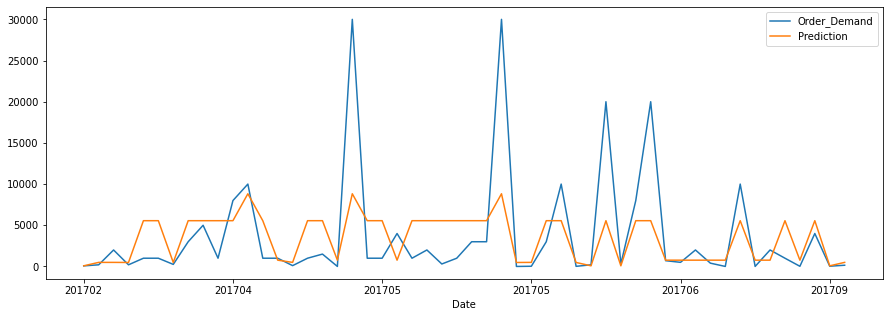

In [ ]:
 data_test[['Order_Demand','Prediction']].plot(figsize=(15, 5))

In [ ]:
data_test.to_csv("ERROR_TRAIL.csv")

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3],
    'max_features': [ 3],
    'n_estimators': [8]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.8s finished


{'bootstrap': True, 'max_depth': 3, 'max_features': 3, 'n_estimators': 8}

In [ ]:
best_random = RandomForestRegressor(bootstrap=True, max_depth=3, max_features=3, n_estimators=7,criterion='mse',max_leaf_nodes=200)
result_dt_r_ = best_random.fit(X_train, y_train)
data_test['Prediction_']=result_dt_r_.predict(X_test)
data_test

,map_Category,num_Region,Order_Demand,md_Date,Prediction,Prediction_
Date,,,,,,
201702,11,3,70,201702,77.076006,76.425158
201703,6,1,200,201703,494.388824,486.241953
201703,6,1,2000,201703,494.388824,486.241953
201703,19,3,200,201703,482.683174,485.831988
201704,18,1,1000,201704,5555.973874,5541.938264
201704,18,1,1000,201704,5555.973874,5541.938264
201704,27,2,250,201704,482.683174,485.831988
201704,18,1,3000,201704,5555.973874,5541.938264
201704,18,1,5000,201704,5555.973874,5541.938264


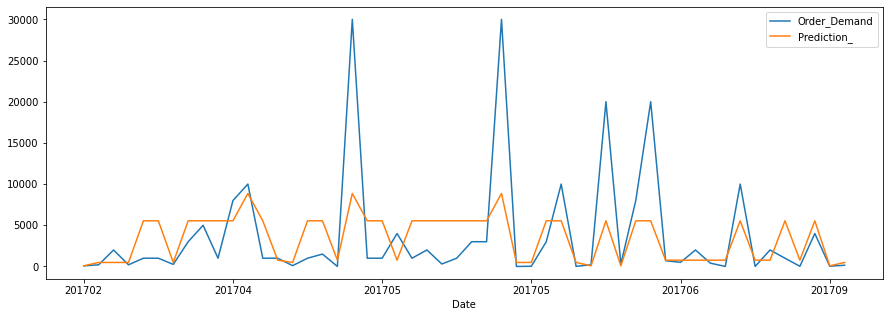

In [ ]:
 data_test[['Order_Demand','Prediction_']].plot(figsize=(15, 5))

In [ ]:
from sklearn.metrics import r2_score
r2_score(data_test['Order_Demand'],data_test['Prediction'])

0.3061343534098001

In [ ]:
from sklearn.metrics import r2_score
r2_score(data_test['Order_Demand'],data_test['Prediction_'])

0.3077434173279717

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(data_test['Order_Demand'], data_test['Prediction_'])

32223863.835308988

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [1,2,3,4,5,6,7,8,10,15,20],
    'criterion':['mse'],
    'max_features': [2, 3],
    #'min_samples_leaf': [3, 4, 5],
    #'min_samples_split': [1,2,3,4,5,6,7,8, 10, 12],
    'n_estimators': [1,2,3,5,6,7,8,9,10,11,12],
    'max_leaf_nodes':[10,20,30,50,80,100,200,300]

}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 2 folds for each of 1936 candidates, totalling 3872 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 57.9min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 76.2min
[Parallel(n_jobs=-1)]: Done 3872 out of 3872 | elapsed: 92.1min finished


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 15,
 'max_features': 3,
 'max_leaf_nodes': 20,
 'n_estimators': 2}

In [ ]:
best_random = RandomForestRegressor(bootstrap=True, max_depth=15, max_features=3,
           max_leaf_nodes=20, n_estimators=2)

In [ ]:
result_dt_r = best_random.fit(X_train, y_train)

In [ ]:
data_test['RF_Prediction_with_Tuning'] = result_dt_r.predict(X_test)

In [ ]:
data_test

,map_Category,num_Region,Order_Demand,md_Date,Prediction,Prediction_,RF_Prediction_with_Tuning
Date,,,,,,,
201702,11,3,70,201702,77.076006,76.425158,281.458460
201703,6,1,200,201703,494.388824,486.241953,281.458460
201703,6,1,2000,201703,494.388824,486.241953,281.458460
201703,19,3,200,201703,482.683174,485.831988,87.182417
201704,18,1,1000,201704,5555.973874,5541.938264,21846.489927
201704,18,1,1000,201704,5555.973874,5541.938264,21846.489927
201704,27,2,250,201704,482.683174,485.831988,695.438741
201704,18,1,3000,201704,5555.973874,5541.938264,21846.489927
201704,18,1,5000,201704,5555.973874,5541.938264,21846.489927


In [ ]:
from sklearn.metrics import r2_score
r2_score(data_test['Order_Demand'],data_test['RF_Prediction_with_Tuning'])

-1.0298061554931563